## 练习 4-3
从[coindesk](https://www.coindesk.com/price/bitcoin)下载比特币每日价格历史数据的CSV文件。阅读该文件并计算比特币价格随时间变化的函数的频谱。它看起来像噪声吗？


In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import librosa
from IPython.display import Audio
import pandas as pd

# 设置中文字体
plt.rcParams["font.family"] = ["DejaVu Sans", "SimHei", "Times New Roman"]  # 使用系统中存在的字体

In [98]:
df = pd.read_csv('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv',   # 这里直接使用了ThinkDSP项目里面下载好的数据
                 parse_dates=[0])
df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.455,123.65499,125.7585,123.63383
2,BTC,2013-10-03,108.58483,125.455,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.675,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566
...,...,...,...,...,...,...
2354,BTC,2020-03-22,5884.3401334651,6187.042145894,6431.8731619281,5802.5534018084
2355,BTC,2020-03-23,6455.4546882515,5829.352510533,6620.8582532297,5694.1982989147
2356,BTC,2020-03-24,6784.3180114254,6455.4506497597,6863.6021964479,6406.0374386706
2357,BTC,2020-03-25,6706.9850891337,6784.3252039507,6981.7203862999,6488.1118850734


(0.0, 2358.0)

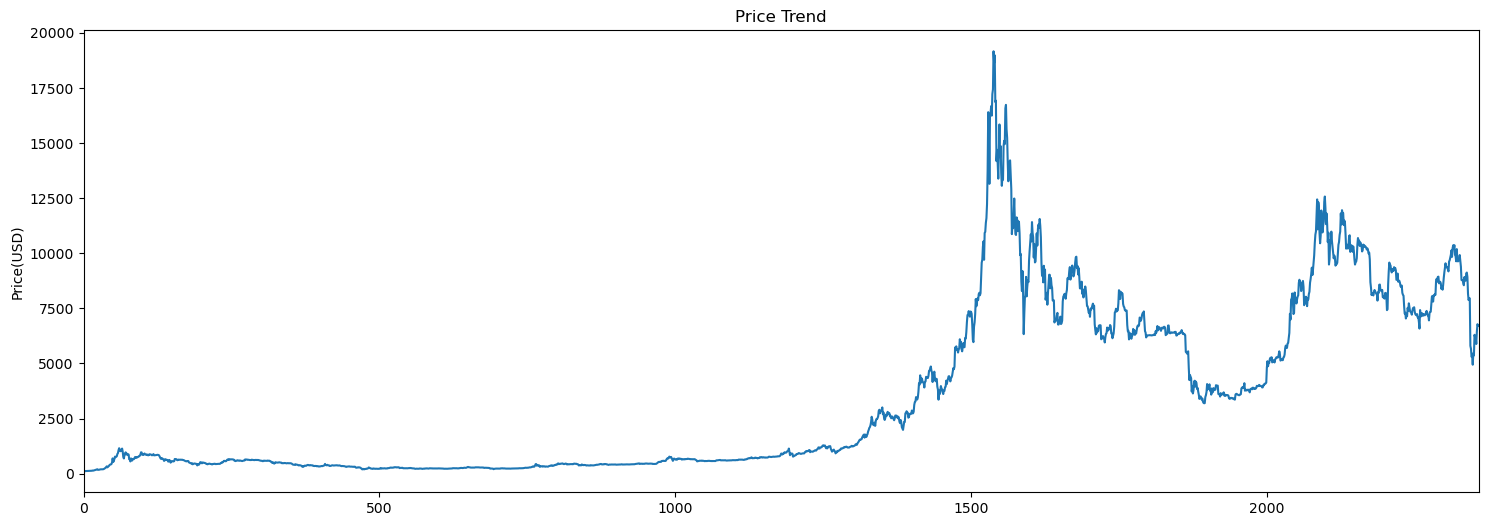

In [99]:
y = df.values[:,2]  # 以closing price作为每日数据
t = df.index

plt.figure(figsize=(18,6))
plt.plot(t, y)
plt.title('Price Trend')
plt.ylabel('Price(USD)')
plt.xlim(t.min(), t.max())

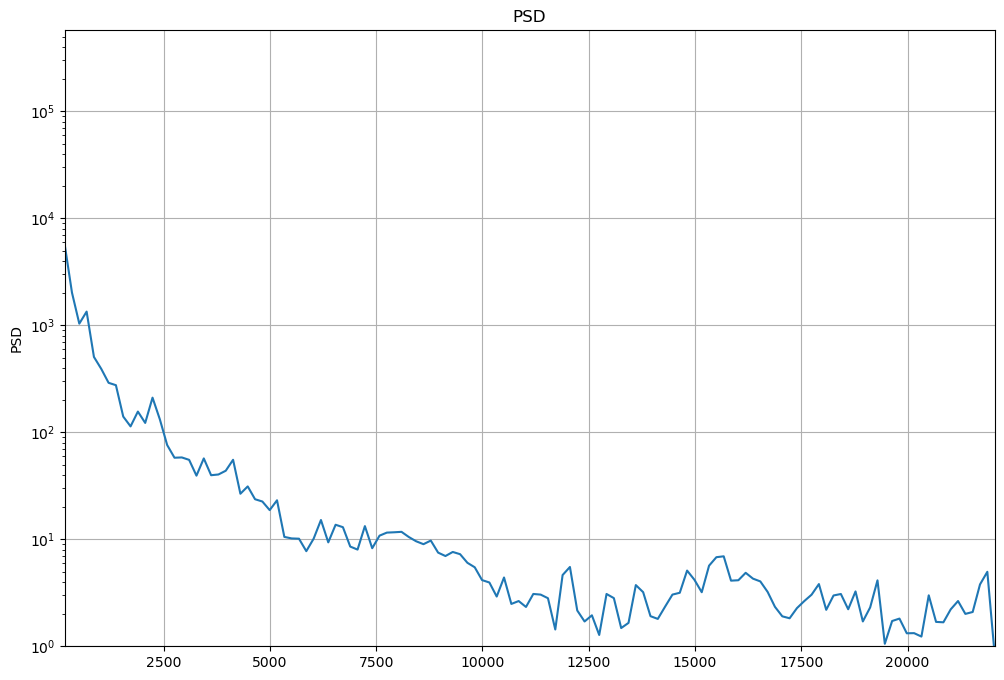

In [100]:
f, PSD = signal.welch(y, 44100, window='boxcar', nperseg=256, noverlap=0)  # 计算PSD

plt.figure(figsize=(12, 8))
plt.semilogy(f, abs(PSD))
plt.title('PSD')
plt.xlim(f[1], f[-1])
plt.ylim(1, abs(PSD).max()*100)
plt.ylabel('PSD')
plt.grid(True)

从功率谱来看，比特币的价格走势接近粉红噪声。